In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
#MID ADD
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [10]:
with open('C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv','rt')as f:
    datas = csv.reader(f)
    #reader = csv.DictReader(open("C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv"))
    #for row in reader:
    #    print(row)
    for row in datas:
        print(row)   

['ID', 'xloc', 'yloc', 'Mobility', 'BV', 'lbs-ft', 'EUR-ft']
['-7', '-873', '14736', '', '', '389', '48']
['-7', '-873', '14736', '', '', '504', '0']
['0', '3364', '5641', '', '51044.73', '251', '59']
['1', '3453', '7876', '20', '51051.7', '317', '56']
['2', '31136', '8032', '8', '53792.48', '498', '76']
['3', '31136', '8032', '9', '26786.69', '497', '13']
['8', '11547', '6965', '', '110607.69', '470', '63']
['12', '31441', '3878', '3', '', '465', '26']
['15', '12258', '19567', '10', '84953.69', '392', '39']
['18', '122', '29865', '14', '', '490', '75']
['19', '-72', '28303', '11', '116035.34', '502', '50']
['20', '-2639', '28712', '10', '126925.16', '443', '55']
['21', '-3772', '27982', '15', '', '257', '43']
['22', '-4596', '27235', '6', '', '38', '42']
['23', '', '', '4', '', '0', '43']
['24', '6945', '13500', '11', '', '459', '59']
['25', '2056', '13316', '8', '96053.42', '452', '48']
['26', '6028', '10001', '14', '80329.11', '521', '69']
['27', '12459', '24798', '11', '82306.64', 

In [3]:

result = pd.read_csv('C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv')
print(result[:64])





       ID     xloc     yloc  Mobility         BV  lbs-ft  EUR-ft
0    -7.0   -873.0  14736.0       NaN        NaN   389.0    48.0
1    -7.0   -873.0  14736.0       NaN        NaN   504.0     NaN
2     0.0   3364.0   5641.0       NaN   51044.73   251.0    59.0
3     1.0   3453.0   7876.0      20.0   51051.70   317.0    56.0
4     2.0  31136.0   8032.0       8.0   53792.48   498.0    76.0
5     3.0  31136.0   8032.0       9.0   26786.69   497.0    13.0
6     8.0  11547.0   6965.0       NaN  110607.69   470.0    63.0
7    12.0  31441.0   3878.0       3.0        NaN   465.0    26.0
8    15.0  12258.0  19567.0      10.0   84953.69   392.0    39.0
9    18.0    122.0  29865.0      14.0        NaN   490.0    75.0
10   19.0    -72.0  28303.0      11.0  116035.34   502.0    50.0
11   20.0  -2639.0  28712.0      10.0  126925.16   443.0    55.0
12   21.0  -3772.0  27982.0      15.0        NaN   257.0    43.0
13   22.0  -4596.0  27235.0       6.0        NaN    38.0    42.0
14   23.0      NaN      N

In [4]:
import statsmodels.api as sm

#df = pd.DataFrame(data.data, columns=data.feature_names)
target = result["EUR-ft"][:64]
y = target
print(target)
X = result[["xloc","yloc","BV","lbs-ft"]][:64]
#X = result["yloc"][:64]
print(X)



0      48.0
1       NaN
2      59.0
3      56.0
4      76.0
5      13.0
6      63.0
7      26.0
8      39.0
9      75.0
10     50.0
11     55.0
12     43.0
13     42.0
14     43.0
15     59.0
16     48.0
17     69.0
18     47.0
19     47.0
20     51.0
21     67.0
22     80.0
23     33.0
24     51.0
25     49.0
26     41.0
27     44.0
28     39.0
29     52.0
      ...  
34    135.0
35     12.0
36      NaN
37    118.0
38    109.0
39     83.0
40     78.0
41     97.0
42     37.0
43     38.0
44     64.0
45    107.0
46     84.0
47     40.0
48     27.0
49    111.0
50     47.0
51     69.0
52     46.0
53     41.0
54     27.0
55     57.0
56    200.0
57     43.0
58     37.0
59     50.0
60     40.0
61     41.0
62      NaN
63     39.0
Name: EUR-ft, Length: 64, dtype: float64
       xloc     yloc         BV  lbs-ft
0    -873.0  14736.0        NaN   389.0
1    -873.0  14736.0        NaN   504.0
2    3364.0   5641.0   51044.73   251.0
3    3453.0   7876.0   51051.70   317.0
4   31136.0   8032.0   5379

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     35.01
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           6.59e-10
Time:                        16:24:09   Log-Likelihood:                -135.22
No. Observations:                  29   AIC:                             278.4
Df Residuals:                      25   BIC:                             283.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xloc          -0.0007      0.001     -1.100      0.282      -0.002       0.001
yloc          -0.0011      0.001     -1.805      0.083      -0.002       0.000
BV            -0.0001      0.000     -1.218      0.235      -0.000    9.19e-05
lbs-ft         0.2065      0.034      6.116      0.000       0.137       0.276
==============================================================================
Omnibus:                        2.239   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.161
Skew:                           0.455   Prob(JB):                        0.560
Kurtosis:                       3.366   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

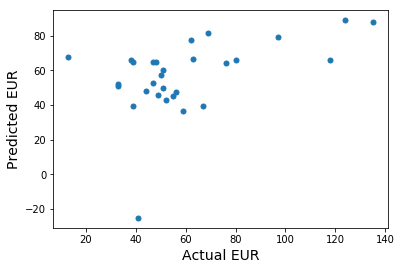

In [14]:
model = sm.OLS(y, X,missing='drop').fit()
predictions = model.predict(X) # make the predictions by the model
plt.plot(y,predictions, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
model.summary()

[[ 48.                  nan]
 [         nan          nan]
 [ 59.          34.24066438]
 [ 56.          44.26114095]
 [ 76.          76.69506248]
 [ 13.          79.90183744]
 [ 63.          65.41984853]
 [ 26.                  nan]
 [ 39.          43.28300464]
 [ 75.                  nan]
 [ 50.          51.64320572]
 [ 55.          39.1846538 ]
 [ 43.                  nan]
 [ 42.                  nan]
 [ 43.                  nan]
 [ 59.                  nan]
 [ 48.          58.34283531]
 [ 69.          75.80259547]
 [ 47.          66.2566927 ]
 [ 47.          54.98692218]
 [ 51.          61.83085585]
 [ 67.          38.17657138]
 [ 80.          61.3829443 ]
 [ 33.          54.02920855]
 [ 51.          51.485884  ]
 [ 49.          47.04170405]
 [ 41.         -15.98308778]
 [ 44.          47.16377762]
 [ 39.          61.89329665]
 [ 52.          41.82158361]
 [ 33.          48.44382647]
 [ 62.          73.46786671]
 [ 97.          74.85979466]
 [124.          83.08732811]
 [135.        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     45.91
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           1.58e-10
Time:                        16:51:48   Log-Likelihood:                -135.91
No. Observations:                  29   AIC:                             277.8
Df Residuals:                      26   BIC:                             281.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc          -0.0009      0.001     -1.538      0.136      -0.002       0.000
BV            -0.0001      0.000     -1.147      0.262      -0.000    9.95e-05
lbs-ft         0.1819      0.025      7.165      0.000       0.130       0.234
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.317
Skew:                          -0.051   Prob(JB):                        0.853
Kurtosis:                       3.502   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

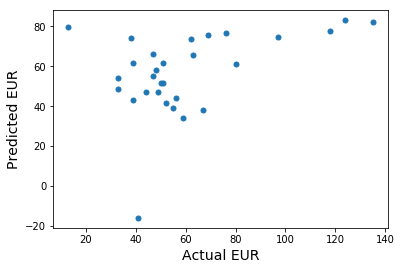

In [20]:
X2 = result[["yloc","BV","lbs-ft"]][:64]
model2 = sm.OLS(y, X2,missing='drop').fit()
predictions2 = model2.predict(X2) # make the predictions by the model
plt.plot(y,predictions2, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
print(np.c_[y,predictions2])
model2.summary()

In [26]:
#Exclude ID 39 (Row 26)
print(X2.iloc[26,:])
print(result.iloc[26,:])

yloc       15905.0
BV        128062.2
lbs-ft        78.0
Name: 26, dtype: float64
ID              39.0
xloc          9798.0
yloc         15905.0
Mobility         NaN
BV          128062.2
lbs-ft          78.0
EUR-ft          41.0
Name: 26, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     75.17
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           4.55e-16
Time:                        16:47:23   Log-Likelihood:                -265.40
No. Observations:                  54   AIC:                             534.8
Df Residuals:                      52   BIC:                             538.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc           0.0002      0.000      0.478      0.635      -0.001       0.001
lbs-ft         0.1300      0.014      9.107      0.000       0.101       0.159
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.510
Skew:                           0.440   Prob(JB):                        0.285
Kurtosis:                       2.416   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

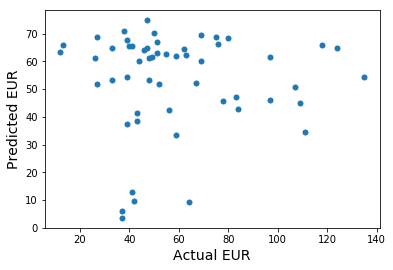

In [17]:
X3 = result[["yloc","lbs-ft"]][:64]
model3 = sm.OLS(y, X3,missing='drop').fit()
predictions3 = model3.predict(X3) # make the predictions by the model
plt.plot(y,predictions3, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
model3.summary()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)